# LR

In [130]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
class OurLogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
       

    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)

        # weights initialization
        self.w = np.zeros(X.shape[1])

        for i in range(self.num_iter):
            z = np.dot(X, self.w)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h-y)) / y.size
            #print(gradient.shape, self.w.shape, z.shape,h.shape)
            #gradient = (h - y) / y.size
            self.w -= self.lr * gradient

    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)

        return self.__sigmoid(np.dot(X, self.w))

    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold
    def score(self, y_pred,y_test):
        return float(sum(y_pred == y_test)) / float(len(y_test))

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")
df.head()

#X = np.array([[1,2],[1,3],[1,4],[1,5]])
#y = np.array([[0],[0],[1],[1]])
#ourRegression=LogisticRegression(alpha=0.01,iterations=10000)

#w, J_history = ourRegression.gradient_descent(X, y)

#print("W encontrado por gradiente descendente: ")
#print(w)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
features=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X=df[features]
y=df.Outcome

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=45)

In [6]:
model = OurLogisticRegression(lr=0.03, num_iter=100)

# fit the model to the training data
model.fit(X_train, y_train)

/tmp/ipykernel_20860/586271459.py:13: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [7]:
# predict probabilities for test set
probs = model.predict_prob(X_test)

# predict classes for test set
y_pred = model.predict(X_test, 0.5)

In [8]:
#print(y_pred)
#print(y_test)
print("Precisión: ",model.score(y_pred,y_test))


Precisión:  0.538961038961039


### Proceso para uniformar la informacion

In [98]:
# datos1 = pd.read_csv('../DataSetGrades/2021-s1.csv')
# print(datos1)
notas2021s1 = pd.read_csv('../DataSetGrades/2021-s1.csv', sep =';')
notas2021s2 = pd.read_csv('../DataSetGrades/2021-s2.csv', sep =';')
notas2022s1 = pd.read_csv('../DataSetGrades/2022-s1.csv', sep =';')
notas2022s2 = pd.read_csv('../DataSetGrades/2022-s2.csv', sep =';')


# Compara los nombres de las columnas
#if set(notas2021s2.columns) == set(notas2022s1.columns):
#    print("Los nombres de las columnas son iguales para ambos archivos")
#else:
#    print("Los nombres de las columnas son diferentes para ambos archivos")

#notas2021s1.head()
#print(notas2021s1)
#columnasMantener2022s2 = ['proyecto 1,', 'proyecto 2', 'examen 1', 'tarea 1']
columnasMantener2021s1 = ['Proyecto Individual Docu 3.75%', 'Proyecto Individual Funcional 11.25%', 'Proyecto Grupal 1 Funcional 13.12%', 'Proyecto Grupal 1 Docu 4.38%', 'Examen 1 15.0%', 'Tarea 1 3.75%', 'Total: ']
columnasMantener2021s2 = ['Proyecto Indiviual Docu 3.75%', 'Proyecto Individual Funcional 11.25%', 'Proyecto Grupal 1 Funcional 13.12%', 'Proyecto Grupal 1 Docu 4.38%', 'Examen 1 15.0%', 'Tarea 1', 'Total: ']
columnasMantener2022s1 = ['Proyecto Individual Docu 3.75%', 'Proyecto Individual Funcional 11.25%', 'Proyecto Grupal 1 Funcional 13.12%', 'Proyecto Grupal 1 Docu 4.38%', 'Examen parcial 1 15%', 'Tarea 1 evaluación 3.75%', 'Total: ']
columnasMantener2022s2 = ['Proyecto Individual Docu 3.75%', 'Proyecto Individual Funcional 11.25%', 'Proyecto Grupal 1 Func Eval 13.12%', 'Proyecto Grupal 1 Docu Eval 4.38%', 'Examen parcial 1 15%', 'Tarea 1 3.75%', 'Total: ']

fixNotas2021s1 = notas2021s1.loc[:, columnasMantener2021s1]
fixNotas2021s2 = notas2021s2.loc[:, columnasMantener2021s2]
fixNotas2022s1 = notas2022s1.loc[:, columnasMantener2022s1]
fixNotas2022s2 = notas2022s2.loc[:, columnasMantener2022s2]


nombresNuevos1 = {'Proyecto Individual Docu 3.75%': 'Proyecto1Docu', 'Proyecto Individual Funcional 11.25%': 'Proyecto1', 'Proyecto Grupal 1 Funcional 13.12%':'Proyecto2', 'Proyecto Grupal 1 Docu 4.38%':'Proyecto2Docu', 'Examen 1 15.0%': 'Examen1', 'Tarea 1 3.75%':'Tarea1', 'Total: ':'Total'}
fixNotas2021s1 = fixNotas2021s1.rename(columns=nombresNuevos1)
nombresNuevos2 = {'Proyecto Indiviual Docu 3.75%': 'Proyecto1Docu', 'Proyecto Individual Funcional 11.25%': 'Proyecto1', 'Proyecto Grupal 1 Funcional 13.12%':'Proyecto2', 'Proyecto Grupal 1 Docu 4.38%':'Proyecto2Docu', 'Examen 1 15.0%': 'Examen1', 'Tarea 1':'Tarea1', 'Total: ':'Total'}
fixNotas2021s2 = fixNotas2021s2.rename(columns=nombresNuevos2)
nombresNuevos3 = {'Proyecto Individual Docu 3.75%': 'Proyecto1Docu', 'Proyecto Individual Funcional 11.25%': 'Proyecto1', 'Proyecto Grupal 1 Funcional 13.12%':'Proyecto2', 'Proyecto Grupal 1 Docu 4.38%':'Proyecto2Docu', 'Examen parcial 1 15%': 'Examen1', 'Tarea 1 evaluación 3.75%':'Tarea1', 'Total: ':'Total'}
fixNotas2022s1 = fixNotas2022s1.rename(columns=nombresNuevos3)
nombresNuevos4 = {'Proyecto Individual Docu 3.75%': 'Proyecto1Docu', 'Proyecto Individual Funcional 11.25%': 'Proyecto1', 'Proyecto Grupal 1 Func Eval 13.12%':'Proyecto2', 'Proyecto Grupal 1 Docu Eval 4.38%':'Proyecto2Docu', 'Examen parcial 1 15%': 'Examen1', 'Tarea 1 3.75%':'Tarea1', 'Total: ':'Total'}
fixNotas2022s2 = fixNotas2022s2.rename(columns=nombresNuevos4)




datos_unificados = pd.concat([fixNotas2021s1, fixNotas2021s2, fixNotas2022s1, fixNotas2022s2], ignore_index=True)
datos_unificados = datos_unificados.applymap(lambda x: x.strip() if isinstance(x, str) else x)

datos_unificados['Proyecto1Docu'] = pd.to_numeric(datos_unificados['Proyecto1Docu'], errors='coerce')
datos_unificados['Proyecto1'] = pd.to_numeric(datos_unificados['Proyecto1'], errors='coerce')
datos_unificados['Proyecto2'] = pd.to_numeric(datos_unificados['Proyecto2'], errors='coerce')
datos_unificados['Examen1'] = pd.to_numeric(datos_unificados['Examen1'], errors='coerce')
datos_unificados['Tarea1'] = pd.to_numeric(datos_unificados['Tarea1'], errors='coerce')
datos_unificados['Total'] = pd.to_numeric(datos_unificados['Total'], errors='coerce')
datos_unificados['Proyecto2Docu'] = pd.to_numeric(datos_unificados['Proyecto2Docu'], errors='coerce')


datos_unificados.to_csv('notasUnificadas.csv', index=False)

#probs = model.predict_prob(X_test)

# predict classes for test set
#y_pred = model.predict(X_test, 0.5)
#print("Precisión: ",model.score(y_pred,y_test))
Proyecto1Docu = 3.75
Proyecto1 = 11.25
Proyecto2Docu = 13.12
Proyecto2 = 4.38
Examen1 = 15
Tarea1 = 3.75
Total = 67.5
datos_unificados = datos_unificados.fillna(0)
datos_unificados['Proyecto1Docu'] = datos_unificados['Proyecto1Docu'].apply(lambda x: x*Proyecto1Docu/100)
datos_unificados['Proyecto1'] = datos_unificados['Proyecto1'].apply(lambda x: x*Proyecto1/100)
datos_unificados['Proyecto2Docu'] = datos_unificados['Proyecto2Docu'].apply(lambda x: x*Proyecto2Docu/100)
datos_unificados['Proyecto2'] = datos_unificados['Proyecto2'].apply(lambda x: x*Proyecto2/100)
datos_unificados['Examen1'] = datos_unificados['Examen1'].apply(lambda x: x*Examen1/100)
datos_unificados['Tarea1'] = datos_unificados['Tarea1'].apply(lambda x: x*Tarea1/100)
datos_unificados['Total'] = datos_unificados['Total'].apply(lambda x: x/100)

datos_unificados.head()
#print(datos_unificados)

# Guarda los datos modificados en un nuevo archivo CSV
#datos.to_csv('archivo_modificado.csv', index=False)




,Proyecto1Docu,Proyecto1,Proyecto2,Proyecto2Docu,Examen1,Tarea1,Total
0,2.8875,11.25,4.380,13.12,7.995,2.85000,0.802
1,0.0000,0.00,0.000,0.00,1.890,0.00000,0.025
2,3.7500,11.25,1.971,13.12,7.440,3.75000,0.808
3,0.0000,0.00,0.000,0.00,0.000,0.00000,0.000
4,3.7500,11.25,4.380,13.12,9.240,2.50125,0.821


### Aplicando feature engeneering
Primero se debe proceder a eliminar todos los datos negativos, en este caso todos loq ue tuvieron 0 en cada asignacion o notuvieron valor alguno dando como nota final un 0

#### Utilizando la regla del rango intercuartílico
Se basa en sacar los intecuartiles de un set de datos encontrados en 75% y el 25% de los datos, ademas es usado especialemente para encontrar outliers

In [99]:
# Calcula la IQR
Q1 = datos_unificados.quantile(0.25)
Q3 = datos_unificados.quantile(0.75)
IQR = Q3 - Q1

# Identifica los outliers
outliers = ((datos_unificados < (Q1 - 1.5 * IQR)) | (datos_unificados > (Q3 + 1.5 * IQR))).any(axis=1)
#print(datos_unificados[outliers])


#### Utilizando z-score
Este se basa principalemente de la desviacion estandar la cual da como un valor que no debe sobre pasar un rango, si lo hace se considera unoutlier

In [100]:
data = datos_unificados.fillna(0)
data = datos_unificados.values

# Calcula el z-score de cada valor
z_scores = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

# Identifica los outliers
outliers = (abs(z_scores) > 3).any(axis=1)
print(data[outliers])





[]


### Ejecucion de modelo

In [123]:

# Seleccionar todas las columnas excepto la última como x
x = datos_unificados.iloc[:, :-1]

# Seleccionar la última columna como y
y = datos_unificados.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=45)

model = OurLogisticRegression(lr=0.005, num_iter=10000)

# fit the model to the training data
model.fit(X_train, y_train)

# predict probabilities for test set
probs = model.predict_prob(X_test)

# predict classes for test set
y_pred = model.predict(X_test, 0.675)

#print(x)
#print(y)

print("Precisión: ",model.score(y_pred,y_test))

y_testValues = y_test.values

# Cambiamos la forma del array a una columna utilizando la función reshape
y_pred_columna = y_testValues.reshape(-1, 1)


# Calcular la precisión del modelo
probsNumpy = np.array(probs) 
print(probsNumpy)
print(y_testValues)
#precision = accuracy_score(y_testValues, probsNumpy)

mse = mean_squared_error(y_testValues, probsNumpy)
mae = mean_absolute_error(y_testValues, probsNumpy)

print("MSE:", mse)
print("MAE:", mae)

r2 = r2_score(y_testValues, probsNumpy)

print("R2 score:", r2)



Precisión:  0.03125
[0.150842   0.14925545 0.83576605 0.8471822  0.72197873 0.79875674
 0.22245783 0.78567423 0.77753615 0.85328365 0.80190817 0.78556263
 0.8755566  0.36113505 0.83647385 0.14869216 0.86331338 0.84928495
 0.85449218 0.15174536 0.76250634 0.70324507 0.81280035 0.14729163
 0.69679163 0.86495673 0.75498924 0.77439612 0.8755566  0.75759024
 0.78432374 0.70932115]
[0.025  0.02   0.802  0.8762 0.769  0.7932 0.2379 0.7616 0.786  0.915
 0.808  0.8009 0.9761 0.2201 0.8804 0.0075 0.9399 0.9261 0.821  0.0125
 0.707  0.6638 0.776  0.     0.696  0.96   0.676  0.763  0.9497 0.683
 0.802  0.6794]
MSE: 0.005663670579907566
MAE: 0.05987549296857899
R2 score: 0.9440000237256904


[0.150842   0.14925545 0.83576605 0.8471822  0.72197873 0.79875674
 0.22245783 0.78567423 0.77753615 0.85328365 0.80190817 0.78556263
 0.8755566  0.36113505 0.83647385 0.14869216 0.86331338 0.84928495
 0.85449218 0.15174536 0.76250634 0.70324507 0.81280035 0.14729163
 0.69679163 0.86495673 0.75498924 0.77439612 0.8755566  0.75759024
 0.78432374 0.70932115]


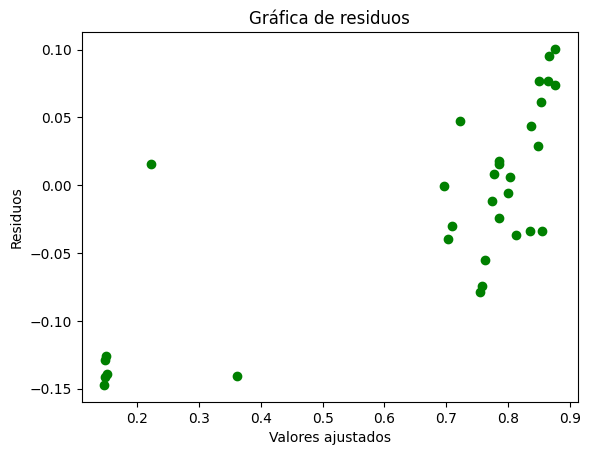

In [128]:
# Calcular los residuos y graficarlos
residuos = y_testValues - probsNumpy
print(probsNumpy)
plt.figure()
plt.scatter(probsNumpy, residuos, color='green')
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.title('Gráfica de residuos')
plt.show()

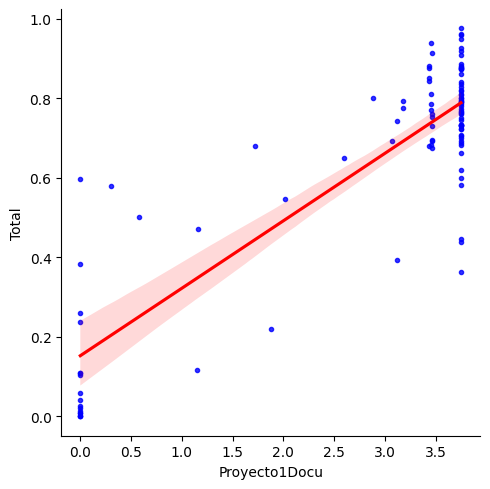

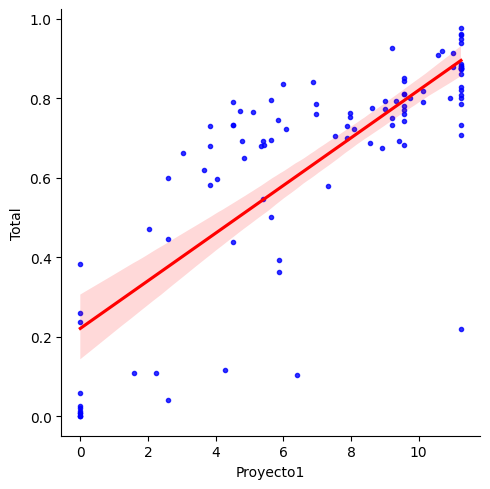

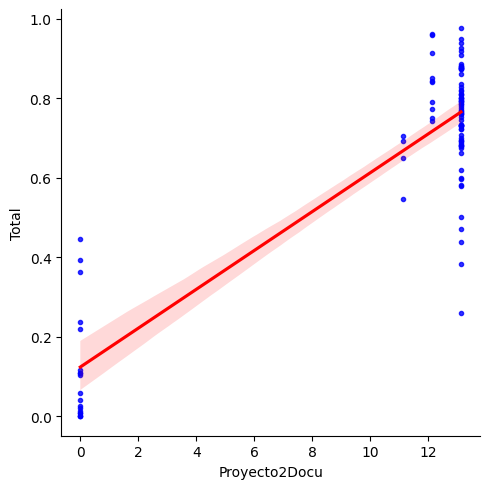

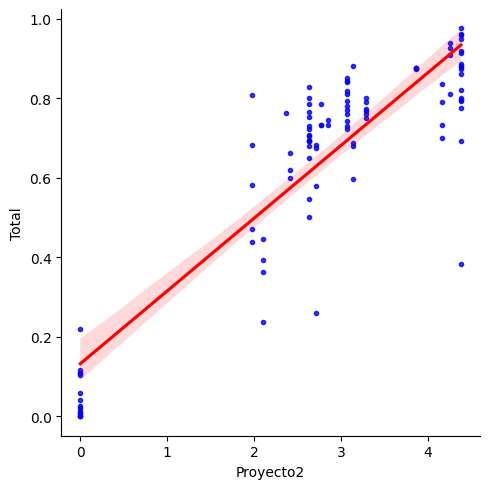

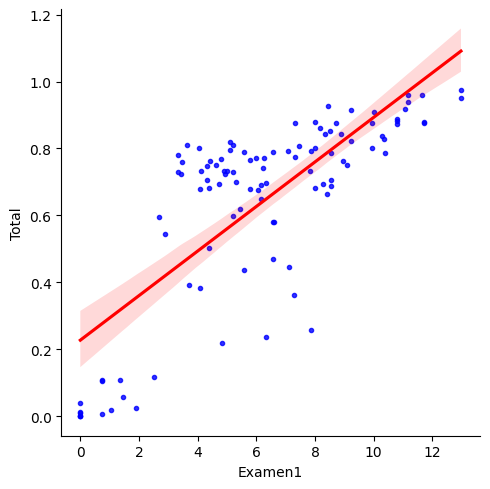

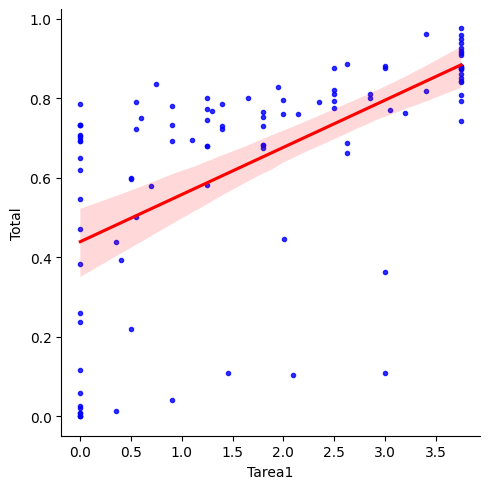

In [132]:
sns.lmplot(x='Proyecto1Docu', y='Total', data=datos_unificados, markers='.', 
           scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
sns.lmplot(x='Proyecto1', y='Total', data=datos_unificados, markers='.', 
           scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
sns.lmplot(x='Proyecto2Docu', y='Total', data=datos_unificados, markers='.', 
           scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
sns.lmplot(x='Proyecto2', y='Total', data=datos_unificados, markers='.', 
           scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
sns.lmplot(x='Examen1', y='Total', data=datos_unificados, markers='.', 
           scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
sns.lmplot(x='Tarea1', y='Total', data=datos_unificados, markers='.', 
           scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
